<a href="https://colab.research.google.com/github/Jayashree24092004/Sentiment-Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn wordcloud nltk matplotlib

In [ ]:
import nltk
nltk.download('punkt','movie_reviews','wordnet','stopwords','omw-1.4')

True

In [ ]:
##Import Libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
nltk.download(['movie_reviews', 'punkt', 'wordnet', 'stopwords', 'omw-1.4'])




[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
df = pd.DataFrame(documents, columns=['text', 'sentiment'])
df['text'] = df['text'].apply(lambda x: ' '.join(x))
print(f"Dataset loaded: {len(df)} reviews\n{df.sentiment.value_counts()}")

Dataset loaded: 2000 reviews
sentiment
neg    1000
pos    1000
Name: count, dtype: int64


In [ ]:
print(df.head())
print(f"\nClass Distribution:\n{df['sentiment'].value_counts()}")


                                                text sentiment
0  plot : two teen couples go to a church party ,...       neg
1  the happy bastard ' s quick movie review damn ...       neg
2  it is movies like these that make a jaded movi...       neg
3  " quest for camelot " is warner bros . ' first...       neg
4  synopsis : a mentally unstable man undergoing ...       neg

Class Distribution:
sentiment
neg    1000
pos    1000
Name: count, dtype: int64


In [ ]:
df = pd.DataFrame(documents, columns=['text', 'sentiment'])
print(df.head())


                                                text sentiment
0  [plot, :, two, teen, couples, go, to, a, churc...       neg
1  [the, happy, bastard, ', s, quick, movie, revi...       neg
2  [it, is, movies, like, these, that, make, a, j...       neg
3  [", quest, for, camelot, ", is, warner, bros, ...       neg
4  [synopsis, :, a, mentally, unstable, man, unde...       neg


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
##Cleaningg
def preprocess_text(text):
    # Lowercase and remove URLs/mentions
    text = text.lower()
    text = re.sub(r'http\S+|@\S+', '', text)

    # Remove punctuation (including smart quotes/dashes)
    text = text.translate(str.maketrans('', '', string.punctuation + '’‘–'))

    # Tokenize and lemmatize
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stopwords and short tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens
              if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(lambda x: preprocess_text(' '.join(x)))

In [ ]:
##vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Captures phrases like "not good"
    min_df=5,            # Ignore terms appearing in <5 docs
    max_df=0.7           # Ignore terms in >70% of docs
)

X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment'].map({'pos': 1, 'neg': 0})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

models = {
    'Random Forest': RandomForestClassifier(n_estimators=200),
    'LinearSVC': LinearSVC(C=0.5, dual=False),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.2f} ± {scores.std():.2f}")


Random Forest: 0.82 ± 0.01
LinearSVC: 0.87 ± 0.01
Logistic Regression: 0.85 ± 0.01


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearSVC(C=0.5, dual=False)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       199
           1       0.82      0.87      0.84       201

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



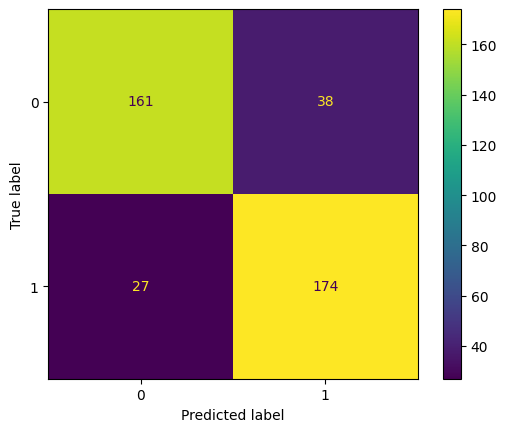

In [ ]:
##visual Diagnostics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.savefig('confusion_matrix.png')

In [ ]:
# Positive reviews word cloud
pos_text = " ".join(df[df.sentiment=='pos']['clean_text'])
WordCloud(width=800, height=400).generate(pos_text).to_file('pos_wordcloud.png')

# Negative reviews word cloud
neg_text = " ".join(df[df.sentiment=='neg']['clean_text'])
WordCloud(width=800, height=400).generate(neg_text).to_file('neg_wordcloud.png')

In [ ]:
"This movie had brilliant performances and a great story!"


'This movie had brilliant performances and a great story!'

In [ ]:
# Function to predict sentiment of a new review
def predict_sentiment(review):
    clean = preprocess_text(review)              # Clean the review
    vec = vectorizer.transform([clean])          # Vectorize
    pred = model.predict(vec)[0]                  # Predict
    return "Positive" if pred == 1 else "Negative"

# Example test inputs
test_reviews = [
    "This movie was absolutely amazing! Great acting and story.",
    "Worst movie ever. A complete waste of time.",
    "The film   was boring.",
    "I loved the cinematography and the soundtrack."
]

for review in test_reviews:
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predict_sentiment(review)}\n")


Review: This movie was absolutely amazing! Great acting and story.
Predicted Sentiment: Positive

Review: Worst movie ever. A complete waste of time.
Predicted Sentiment: Negative

Review: The film   was boring.
Predicted Sentiment: Negative

Review: I loved the cinematography and the soundtrack.
Predicted Sentiment: Positive



In [ ]:
# Save model and vectorizer
import joblib

joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
from IPython.display import display
import ipywidgets as widgets
import joblib

# Load model and vectorizer
model = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Create interactive widget
review_input = widgets.Textarea(placeholder='Enter your movie review...', description='Review:', layout={'width': '80%', 'height': '100px'})
analyze_btn = widgets.Button(description="Analyze Sentiment")
output = widgets.Output()

def analyze_review(btn):
    with output:
        output.clear_output()
        review = review_input.value.strip()
        if not review:
            print("⚠️ Please enter a review first!")
            return
        clean_text = preprocess_text(review)
        prediction = model.predict(vectorizer.transform([clean_text]))[0]
        print(f"📝 Your Review: {review}\n🧹 Cleaned Text: {clean_text[:200]}...\n🎭 Prediction: {'POSITIVE 👍' if prediction == 1 else 'NEGATIVE 👎'}")

analyze_btn.on_click(analyze_review)
display(widgets.VBox([review_input, analyze_btn, output]))
